# Rohingya refugee crisis - Environmental impact


This notebook is inspired from a map published by [REACH initiatives](http://www.reach-initiative.org). The goals are to:

* Reproduce the results presented in Bangladesh: Rohingya Refugee Crisis – Cox’s Bazar District – Environmental Impact by NDVI Analysis – January 2017 to 2018.
* Add visualisation of the evolution of the environmental impact over 2017.
* Propose a different approach to visualise the vegetation decline.
* Calculate the size and evolution of the impacted area over 2017.

Table of contents:

* Preparing data: Loads the relevant satellite images and defines how NDVI will be computed.
* NDVI difference: Approach taken by REACH initiatives.
* NDVI significant difference: Different approach taking deviation from natural NDVI variations to detect areas with human activities.


In [0]:
!pip install rasterio

     |████████████████████████████████| 18.0MB 41.1MB/s 


## Preparing data

We are using Landast 8 data stored in [AWS](https://aws.amazon.com/public-datasets/landsat/). The `scenes` variable lists satellite captures that we are going to use through the analysis (2013-2018).

In [0]:
scenes = [
  ("2018-03-02 04:18:44.086538", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20180302_20180308_01_T1/index.html"),
  ("2018-01-29 04:18:57.223803", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20180129_20180207_01_T1/index.html"),
  ("2017-12-28 04:19:12.829124", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20171228_20180103_01_T1/index.html"),
  ("2017-11-26 04:19:12.787619", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20171126_20171206_01_T1/index.html"),
  ("2017-10-25 04:19:20.646269", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20171025_20171107_01_T1/index.html"),
  ("2017-05-02 04:18:18.709814", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20170502_20170515_01_T1/index.html"),
  ("2017-03-15 04:18:45.840678", "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/136/045/LC08_L1TP_136045_20170315_20170328_01_T1/index.html"),
  ("2013-12-01 04:20:39.719730", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452013335LGN00/index.html"),
  ("2014-01-02 04:20:25.397747", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014002LGN00/index.html"),
  ("2014-02-03 04:20:04.705757", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014034LGN00/index.html"),
  ("2014-04-24 04:18:53.958962", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014114LGN00/index.html"),
  ("2014-11-18 04:19:13.628487", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014322LGN00/index.html"),
  ("2014-12-04 04:19:12.852564", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014338LGN00/index.html"),
  ("2015-02-22 04:18:50.973848", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452015053LGN00/index.html"),
  ("2015-03-10 04:18:41.414722", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452015069LGN00/index.html"),
  ("2015-11-21 04:19:11.057319", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452015325LGN00/index.html"),
  ("2016-10-22 04:19:23.161352", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452016296LGN00/index.html"),
  ("2017-01-10 04:19:13.332070", "https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452017010LGN00/index.html")
]

In [0]:
import datetime
import os
import urllib


def parse_date(d):
    return datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S.%f")


raster_meta = [
  (parse_date(date), url) for date, url in scenes
]

raster_meta = sorted(raster_meta)
raster_dates = [x[0] for x in raster_meta]

url_components = [x[1].split("/")[:-1] for x in raster_meta]
base_urls = ['/'.join(x + [x[-1]]) for x in url_components]
base_files = ["img/" + x[-1] for x in url_components]

# Downloading ONLY missing files under img/ folder
if not os.path.exists("img/"):
    os.mkdir("img")
for base_url, base_file in zip(base_urls, base_files):
    for band in ("B4", "B5"):
        band_file = base_file + "_" + band + ".TIF"
        band_url = base_url + "_" + band + ".TIF"
        if not os.path.exists(band_file):
            print("DOWNLOAD: %s" % band_url)
            tmp = urllib.request.urlretrieve(band_url, band_file)



DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452013335LGN00/LC81360452013335LGN00_B4.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452013335LGN00/LC81360452013335LGN00_B5.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014002LGN00/LC81360452014002LGN00_B4.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014002LGN00/LC81360452014002LGN00_B5.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014034LGN00/LC81360452014034LGN00_B4.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014034LGN00/LC81360452014034LGN00_B5.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014114LGN00/LC81360452014114LGN00_B4.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/landsat-pds/L8/136/045/LC81360452014114LGN00/LC81360452014114LGN00_B5.TIF
DOWNLOAD: https://s3-us-west-2.amazonaws.com/lan

In [0]:
%matplotlib inline
import numpy as np
import rasterio
from rasterio.windows import Window
import matplotlib.pyplot as plt

ndvi_analysis_rasters = [
    (d, f) for d, f in zip(raster_dates, base_files) if d.year >= 2017
]

ndvi_dates, ndvi_files = zip(*ndvi_analysis_rasters)

KUTU_TARGET = (413181, 2345908)
WIDTH_PX = 600
HEIGHT_PX = 600

KUTU_CROP = dict(
    col_off=5500,
    row_off=5500,
    width=750,
    height=750
)

def load_ndvi(base_filenames, window_data):
    # Read raster bands directly to Numpy arrays
    # Computes NDVI
    center_epsg, width_px, height_px = window_data
    ndvi = []
    for bf in base_filenames:
        band_data = []
        for band in ("B4", "B5"):
            with rasterio.open('%s_%s.TIF' % (bf, band)) as src:
                center_px = ~src.transform * center_epsg
                crop = dict(
                    col_off=center_px[0] - width_px/2,
                    row_off=center_px[1] - height_px/2,
                    width=width_px,
                    height=height_px
                )

                band_data.append(
                    src.read(1, window=Window(**crop)).astype(np.float64)
                )
        
        red, nir = band_data
        # NDVI
        ndvi.append(np.where((nir + red) > 0, 1.0*(nir - red)/(nir + red), 0))
    
    return ndvi



## NDVI difference

The idea here is to replicate the results found in [this paper](http://www.reachresourcecentre.info/system/files/resource-documents/reach_bgd_map_coxsbazar_kutupalong_ndvi_jan2017-2018_a0.pdf). We are using data from January 2017 to March 2018.

First, we need to load NDVI data for the region around Kutupalong.

In [0]:
ndvi = load_ndvi(ndvi_files, (KUTU_TARGET, WIDTH_PX, HEIGHT_PX))

### Evolution of NDVI values

The following figures plot the NVDI values around Kutupalong for 2017-01 / 2018-03.

The decline of vegetation is barely noticable by just looking at NDVI. It appears as a yellow/green area growing in the center from October 2017 (4th image).

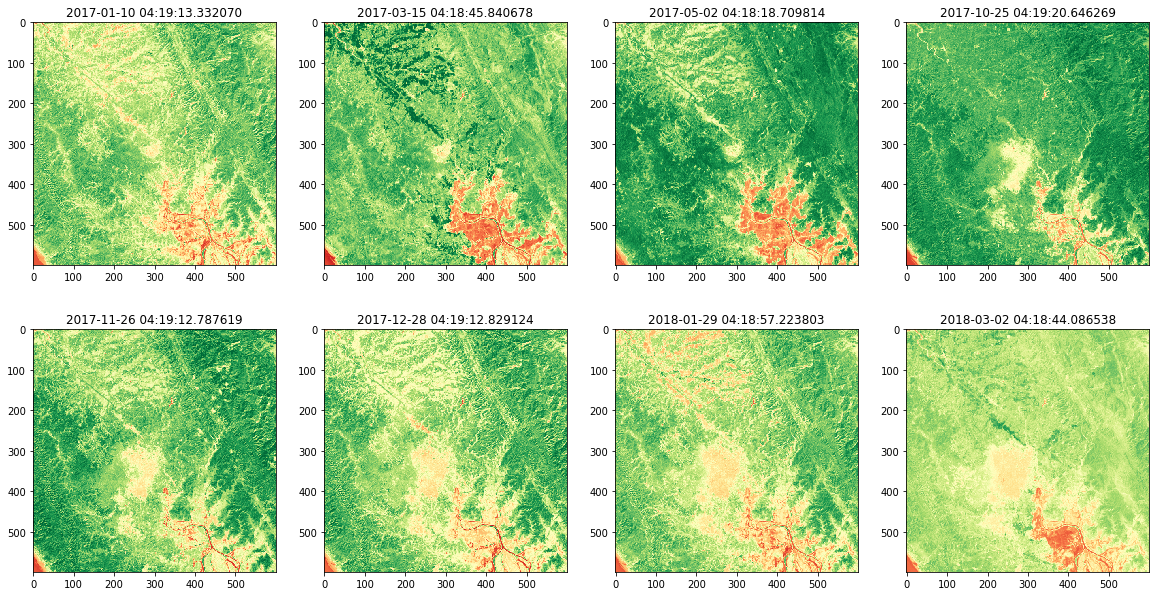

In [0]:
v_min = -0.2
v_max = 0.7
v_min_col = 0
v_max_col = 2**16-1
n_columns = 4

fig = plt.figure(figsize=(20, 16))
for i, (d, n) in enumerate(zip(ndvi_dates, ndvi)):
  fig.add_subplot(len(ndvi)/n_columns+1, n_columns, i+1)
  plt.title(d)
  # Putting in range
  n = (n - v_min)/v_max
  n = np.maximum(n, 0)
  n = np.minimum(n, 1)
  plt.imshow((n * (2**16-1)).astype(np.uint16), cmap='RdYlGn', vmin=v_min_col, vmax=v_max_col)


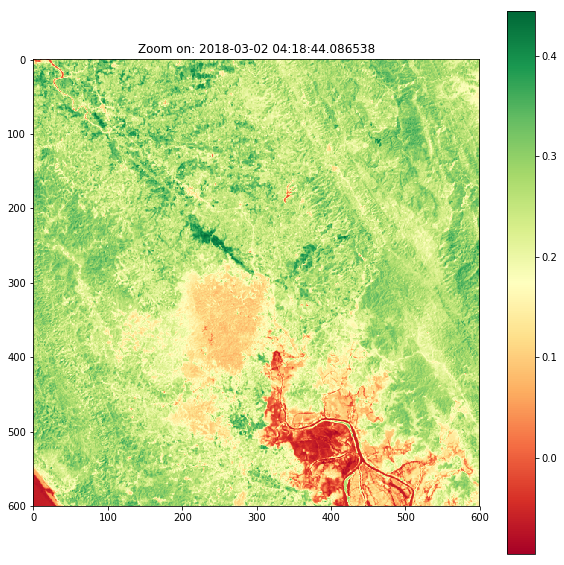

In [0]:
# Zoom on the last image

i = len(ndvi)-1
fig = plt.figure(figsize=(10, 10))
plt.title("Zoom on: %s" % str(ndvi_dates[i]))
plt.imshow(ndvi[i], cmap='RdYlGn')
plt.colorbar();

### Evolution of NDVI difference

The first way to make the vegetation decline more visible is to take the difference of NVDI using January 2017 as a reference. For instance, the image below for October 2017 is computed as NDVI(2017-10) - NDVI(2017-01). If the vegetation declined, it will appear as red.

By taking this difference, it becomes clear that vegetation has been rapidly declining around Kutupalong camp starting from October 2017.

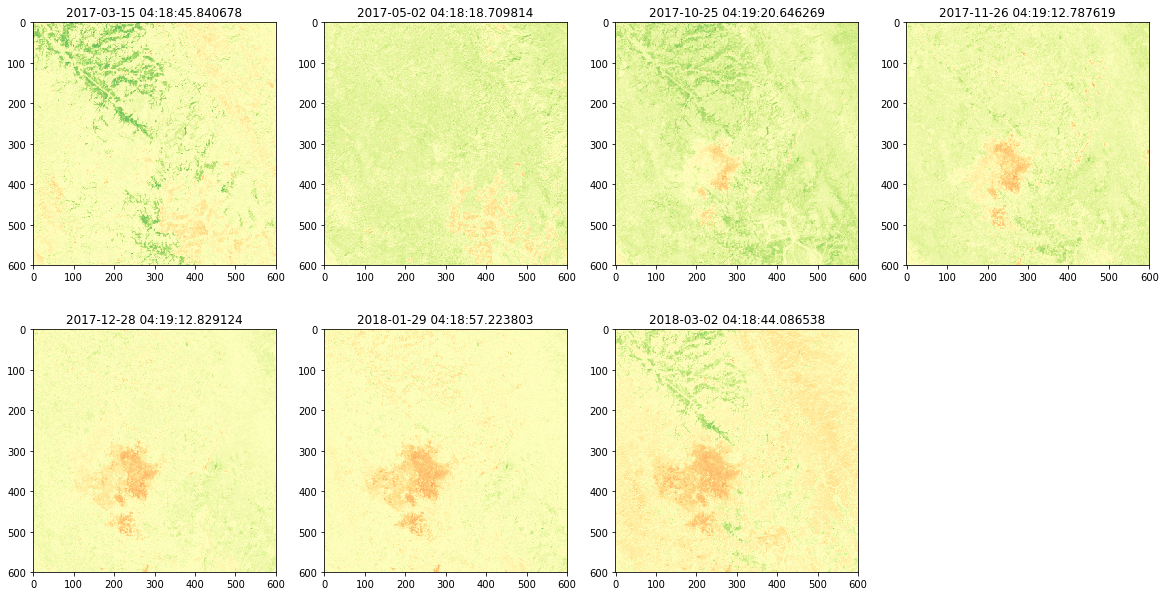

In [0]:
REF = 0
v_min = -0.8
v_max = 0.8
n_columns = 4

fig = plt.figure(figsize=(20, 16))
figpos = 1
for i in range(0, len(ndvi)):
    if i != REF:
        fig.add_subplot(len(ndvi)/n_columns+1, n_columns, figpos)
        figpos += 1
        plt.title(ndvi_dates[i])
        plt.imshow(ndvi[i] - ndvi[REF], cmap='RdYlGn', vmin=v_min, vmax=v_max)


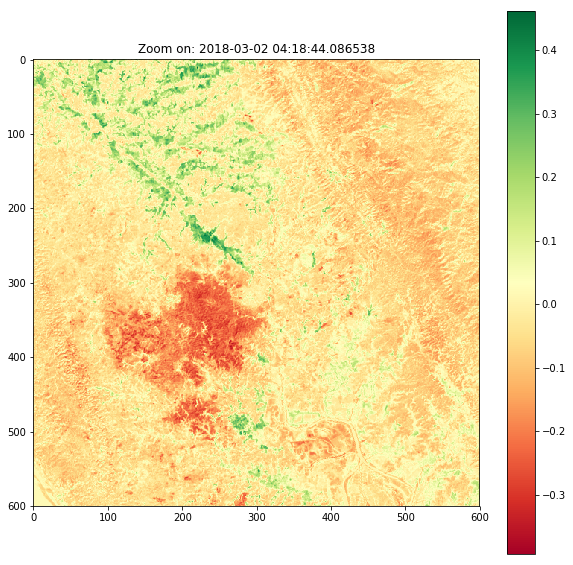

In [0]:
# Zoom on the last image
i = len(ndvi)-1 if REF != len(ndvi)-1 else len(ndvi) - 2

fig = plt.figure(figsize=(10, 10))
plt.title("Zoom on: %s" % str(ndvi_dates[i]))
plt.imshow(ndvi[i] - ndvi[REF], cmap='RdYlGn')
plt.colorbar();

This approach highlights that there has been a decrease in vegetation in SW area from Kutupalong. We also note that, generally, the vegetation has declined compared with January 2017. This is most likely due to different weather conditions. Is there a way to statistically identify areas with vegetation decline caused by human activities?

We'll describe a method to separate natural variations from variations due to human activities.

## NDVI significant difference

Assumption: there has been no major wood cutting activity in the region before 2017. Therefore, data from before 2017 is a good candidate to learn the natural changes in vegetation coverage.

The approach taken in this section learns the natural variations of NDVI using data from 2013 to 2017. The resulting model is used to compute deviations from natural trends between 2017 and 2018. The statistically significant deviations are considered to be due to human activities.

First, we need to load the NDVI data starting from 2013.

In [0]:
all_ndvi = load_ndvi(base_files, (KUTU_TARGET, WIDTH_PX, HEIGHT_PX))

We split the dataset into a training set (2013-2016) and a test set (2017-2018). The training set will help us understand the normal variations of NDVI. We'll use the test set to analyse human activities.

We assume that each pixel follows a normal distribution. We have to learn two parameters mu and sigma (mean and scale). We call significant deviations any pixel with a value lower than the 99% confidence value for the normal distribution N(mu, sigma). Additional smoothing is applied to keep only areas with multiple significant pixels.

In [0]:
from scipy.signal import convolve2d

pre_2017 = [date.year < 2017 for date, _ in raster_meta]
training = [n for n, p in zip(all_ndvi, pre_2017) if p]
test = [n for n, p in zip(all_ndvi, pre_2017) if not p]
test_dates = [d for (d, _), p in zip(raster_meta, pre_2017) if not p]

# Getting normal distrib params
t_mean = np.mean(training, axis=0)
t_std = np.std(training, axis=0)

# Distance from normal dist
t_test = (test - t_mean)/t_std
ci_dist = 1.*(t_test < -2.32) # 99% confidence level gaussian = 2.32
ci_dist = [1.*convolve2d(cd, np.ones((4, 4))/16, 'same') > 0.5 for cd in ci_dist]  # Smoothing

### Natural variations


First, we visualise natural variations showing the mean NDVI and standard deviation learnt from the years before 2017.

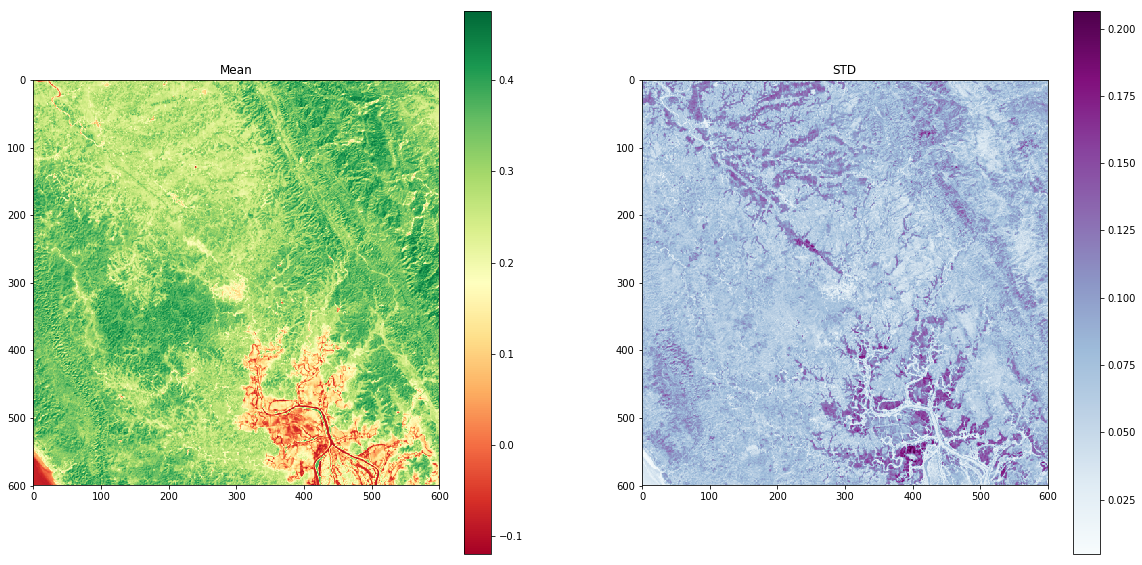

In [0]:
fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1, 2, 1)
plt.title("Mean")
plt.imshow(t_mean, cmap="RdYlGn")
plt.colorbar()


fig.add_subplot(1, 2, 2)
plt.title("STD")
plt.imshow(t_std, cmap="BuPu")
plt.colorbar();


### Human activity area

The following graphs show statistically significant decrease of NDVI in white (same area as before).

There is as expected a large area with NDVI decrease SE of Kutupalong starting mid-2017. But most importantly, this is the only area with a significant deviation. This supports the hypothesis that human activity caused the vegetation decline.

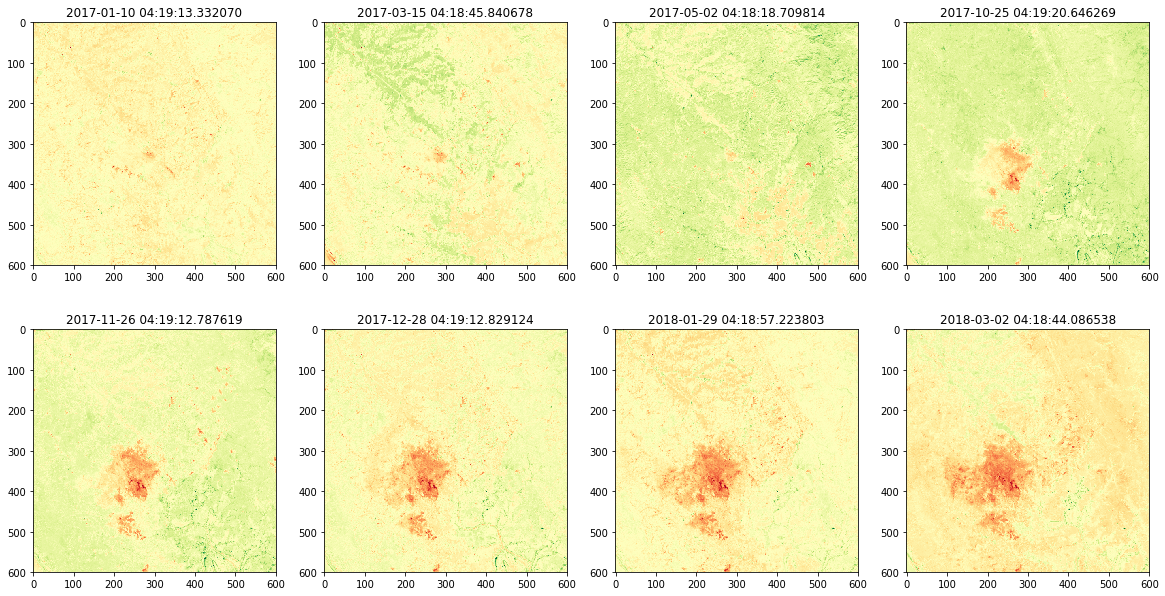

In [0]:
v_min = -3.5
v_max = 3.5
n_columns = 4

fig = plt.figure(figsize=(20, 16))
for i, (n, d) in enumerate(zip(t_test, test_dates)):
  fig.add_subplot(len(t_test)/n_columns+1, n_columns, i+1)
  plt.title(d)
  plt.imshow(
      n/2.32, # Making every number >1 an anomaly
      cmap="RdYlGn", 
      vmin=v_min, 
      vmax=v_max
  )

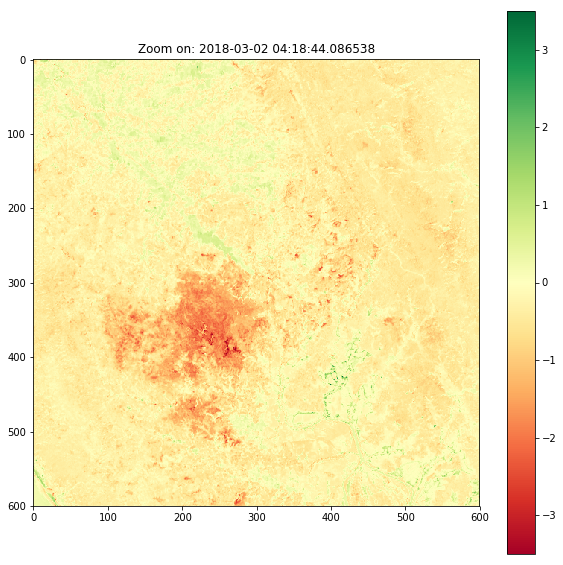

In [0]:
# Zoom on the last image
i = len(t_test)-1
v_min = -3.5
v_max = 3.5

fig = plt.figure(figsize=(10, 10))
plt.title("Zoom on: %s" % str(test_dates[i]))
plt.imshow(t_test[i]/2.32, cmap='RdYlGn', vmin=v_min, vmax=v_max)
plt.colorbar();

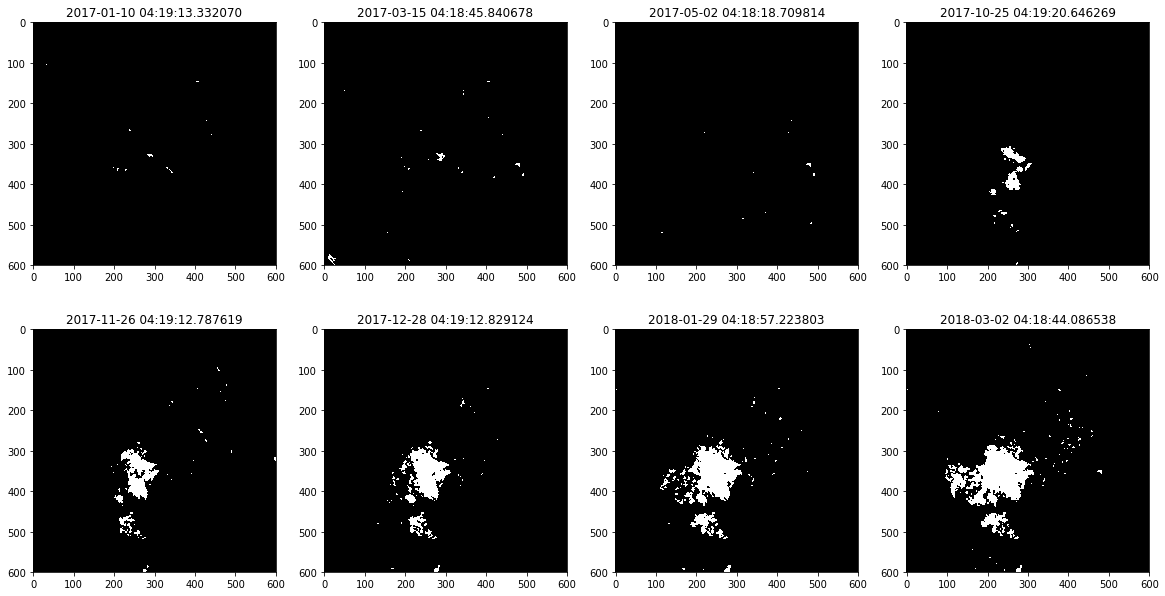

In [0]:
# Applying a threshold
v_min = None
v_max = None
n_columns = 4

fig = plt.figure(figsize=(20, 16))
for i, (n, d) in enumerate(zip(ci_dist, test_dates)):
    fig.add_subplot(len(ci_dist)/n_columns+1, n_columns, i+1)
    plt.title(d)
    plt.imshow(n, cmap="gray", vmin=v_min, vmax=v_max)

### Quantifying vegetation decline

Using the previous results, it is possible to quantify the area with vegetation decline over time. By counting the number of pixels with a significant deviation and multiplying by the area of a pixel (assumed to be 30m x 30m), we obtain the following graph that shows vegetation decrease over time.

The vegetation decline has greatly accelerated since October 2017.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


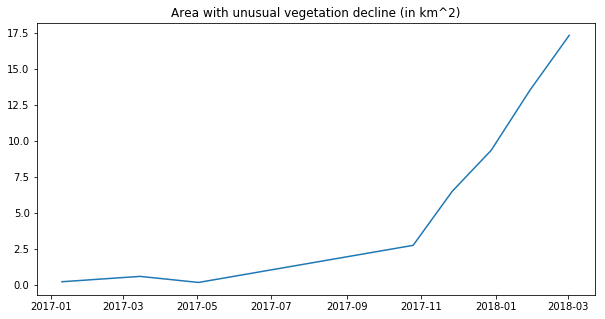

In [0]:
area = [np.sum(x)*0.03**2 for x in ci_dist]  # assuming 1px=30m*30m

plt.figure(figsize=(10, 5))
plt.title("Area with unusual vegetation decline (in km^2)")
plt.plot(test_dates, area, '-');